In [2]:
import numpy as np
import pandas as pd 
import pandas.util.testing as tm
# data spliting
from sklearn.model_selection import train_test_split
# keras api
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [6]:
from google.colab import files
file = files.upload()

Saving data.csv to data.csv


In [11]:
 df = pd.read_csv('data.csv')

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
df.shape

(569, 33)

In [14]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
df[df['Unnamed: 32'].isnull()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [21]:
 df.dropna(axis=1, inplace=True)

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.shape

(569, 32)

In [24]:
df['diagnosis'] = np.where(df['diagnosis']=='M' , 1 , 0)

In [25]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
X = df.iloc[:,2::]

In [28]:
X.shape

(569, 30)

In [29]:
Y = df.iloc[:, 1:2]

In [30]:
Y.shape

(569, 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=30)

In [32]:
Classification_Model = Sequential()

In [34]:
Classification_Model.add(Dense(units= 16, activation = 'relu', input_dim=30))
# units indicates here the output dimention of Dense layer 
Classification_Model.add(Dense(units=8, activation = 'relu'))
Classification_Model.add(Dense(units=6, activation = 'relu'))
Classification_Model.add(Dense(units=1, activation = 'relu'))

In [37]:
Classification_Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
print(Classification_Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 965
Trainable params: 965
Non-trainable params: 0
_________________________________________________________________
None


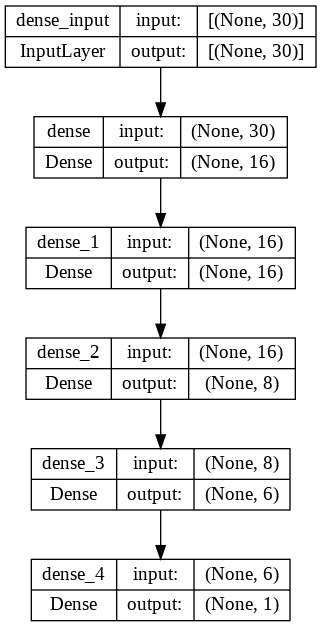

In [39]:
plot_model(Classification_Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
Classification_Model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
381/381 [==============================] - 2s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 2/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 3/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 4/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 5/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 6/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 7/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 8/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 9/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325
Epoch 10/50
381/381 [==============================] - 1s 2ms/step - loss: 5.6680 - accuracy: 0.6325

In [41]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
351,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.15500,0.5046,0.6872,0.21350,0.4245,0.10500
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.14020,0.1402,0.1055,0.06499,0.2894,0.07664
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790
474,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,11.94,19.35,80.78,433.1,0.13320,0.3898,0.3365,0.07966,0.2581,0.10800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.15150,0.1026,0.1181,0.06736,0.2883,0.07748
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.2117,0.3446,0.14900,0.2341,0.07421
147,14.95,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,16.25,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218
53,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,20.60,24.13,135.10,1321.0,0.12800,0.2297,0.2623,0.13250,0.3021,0.07987


In [ ]:
prediction = Classification_Model.predict(X_test)
prediction = [1 if y>0.5 else 0 for y in prediction] #list
prediction

In [46]:
len(prediction)

188

In [48]:
type(prediction)

list

In [49]:
type(y_test)

pandas.core.frame.DataFrame

In [50]:
pred = pd.DataFrame(prediction)

In [51]:
type(pred)

pandas.core.frame.DataFrame

In [52]:
pred = pred.values

In [53]:
y_test_ndrray = y_test.values

In [62]:
total = 0
correct = 0
wrong = 0

for i in range(len(pred)):
    total = total+1
    if(y_test_ndrray[i]== pred[i]):
      correct = correct+1
    else:
      wrong = wrong+1
print('Total = ' + str(total))
print('Correct = ' + str(correct) +' - Percentage correct: ' + str(round((correct/total)*100, 2))+'%')
print('Wrong = ' +str(wrong) + ' Percentage wrong : ' + str(round((wrong/total)*100, 2)) + '%')



Total = 188
Correct = 116 - Percentage correct: 61.7%
Wrong = 72 Percentage wrong : 38.3%


In [63]:
len(X_test)

188

In [76]:
input1 = X_test.iloc[[149]]
input1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
129,19.79,25.12,130.4,1192.0,0.1015,0.1589,0.2545,0.1149,0.2202,0.06113,...,22.63,33.58,148.7,1589.0,0.1275,0.3861,0.5673,0.1732,0.3305,0.08465


In [67]:
input1.shape

(1, 30)

In [68]:
prediction1 = Classification_Model.predict(input1)
prediction1

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [69]:
prediction1 = ['1' if prediction1>0.5 else '0' for y in prediction1]
prediction1

['0']

In [77]:
df.loc[(df['area_mean']==1192.0) & (df['concavity_mean']==0.2545)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
129,866674,1,19.79,25.12,130.4,1192.0,0.1015,0.1589,0.2545,0.1149,...,22.63,33.58,148.7,1589.0,0.1275,0.3861,0.5673,0.1732,0.3305,0.08465
